In [5]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

RandomForestClassifier()
RandomForestRegressor()

RandomForestRegressor()

RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)

RandomForestRegressor(
    n_estimators=100,
    *,
    criterion='mse',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None,
)

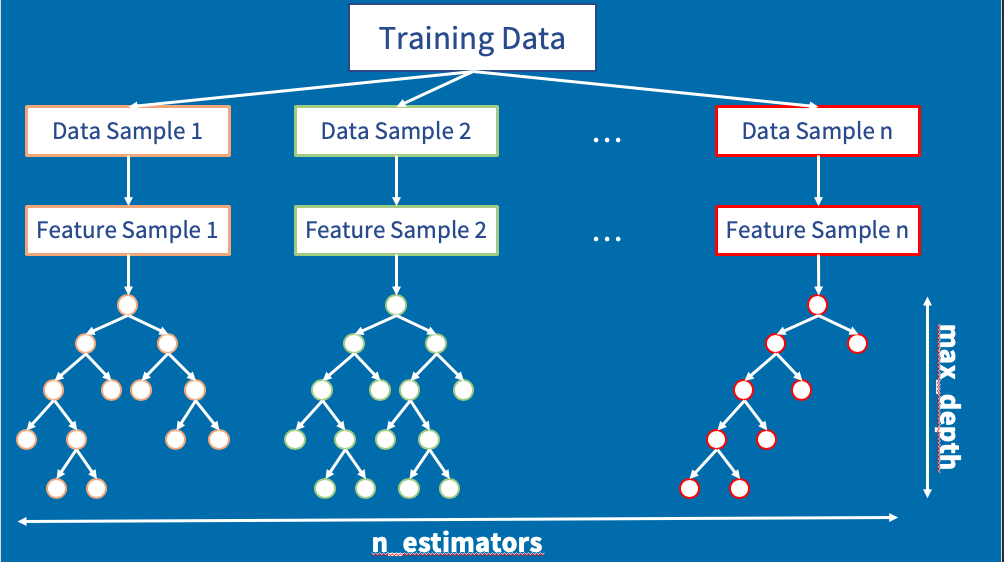

In [6]:
import joblib 
import pandas as pd
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)
warnings.filterwarnings('ignore', category = DeprecationWarning)
tr_features= pd.read_csv('/ML/Applied ML Algorithms/L1/train_features.csv')
tr_labels=pd.read_csv('/ML/Applied ML Algorithms/L1/train_label.csv')
tr_labels.head(5)

,Survived
0,1
1,0
2,1
3,0
4,1


In [7]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [9]:
rf = RandomForestClassifier()
parameters = {
        'n_estimators': [5, 50, 250],
        'max_depth': [2, 4, 8, 16, 32, None]
#     This none setting will let the tree go as deep as it wants until it reaches some level of training at a tolerance that's defined within Random Forest classifier.
}
cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 4, 'n_estimators': 50}

0.794 (+/-0.125) for {'max_depth': 2, 'n_estimators': 5}
0.798 (+/-0.123) for {'max_depth': 2, 'n_estimators': 50}
0.8 (+/-0.112) for {'max_depth': 2, 'n_estimators': 250}
0.785 (+/-0.118) for {'max_depth': 4, 'n_estimators': 5}
0.826 (+/-0.11) for {'max_depth': 4, 'n_estimators': 50}
0.818 (+/-0.115) for {'max_depth': 4, 'n_estimators': 250}
0.803 (+/-0.033) for {'max_depth': 8, 'n_estimators': 5}
0.813 (+/-0.085) for {'max_depth': 8, 'n_estimators': 50}
0.822 (+/-0.061) for {'max_depth': 8, 'n_estimators': 250}
0.79 (+/-0.055) for {'max_depth': 16, 'n_estimators': 5}
0.8 (+/-0.048) for {'max_depth': 16, 'n_estimators': 50}
0.807 (+/-0.022) for {'max_depth': 16, 'n_estimators': 250}
0.8 (+/-0.033) for {'max_depth': 32, 'n_estimators': 5}
0.807 (+/-0.043) for {'max_depth': 32, 'n_estimators': 50}
0.813 (+/-0.04) for {'max_depth': 32, 'n_estimators': 250}
0.8 (+/-0.081) for {'max_depth': None, 'n_estimators': 5}
0.807 (+/-0.019) for {'m

Before we dig into the results, I just want to call out that with Random Forest, Even if I ran this exact cell again, on the same exact training set, I would get different results. That's because each time you run Random Forest, it is randomly sampling rows and columns internally.

In [11]:
cv.best_estimator_

RandomForestClassifier(max_depth=4, n_estimators=50)

In [12]:
joblib.dump(cv.best_estimator_, '/ML/Applied ML Algorithms/Models/RF_model.pkl')

['/ML/Applied ML Algorithms/Models/RF_model.pkl']